In [1]:
from deepSculpt.utils.plotter import Plotter
from deepSculpt.source.data import DataLoaderCreator

sculptor =  DataLoaderCreator()

volumes, colors = sculptor.create_sculpts(
    n_samples=int(os.environ.get("N_SAMPLES_CREATE")),
    n_edge_elements=0,
    n_plane_elements=0,
    n_volume_elements=10,
    color_edges="dimgrey",
    color_planes="snow",
    color_volumes=["crimson", "turquoise", "gold"],
    verbose=False,
    void_dim=int(os.environ.get("VOID_DIM")),
)

out_dir = os.path.join(os.environ.get('HOME'), 'code', 'juan-garassino',
                       'deepSculpt', 'results', 'snapshots')




2022-10-20 21:33:20.727624: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-20 21:33:20.727642: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-20 21:33:22.710165: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-10-20 21:33:22.710223: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (celcius): /proc/driver/nvidia/version does not exist
2022-10-20 21:33:22.710681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other o


🔽 Just created 'raw_data' shaped (7, 128, 128, 128) and 'color_raw_data' shaped(7, 128, 128, 128)



🔽 Just created a snapshot image[20-10-2022-21-43].png @ /home/juan-garassino/code/juan-garassino/deepSculpt/results/snapshots

🔽 Just created a vectorial snapshot vectorial[20-10-2022-21-43].svg @ /home/juan-garassino/code/juan-garassino/deepSculpt/results/snapshots


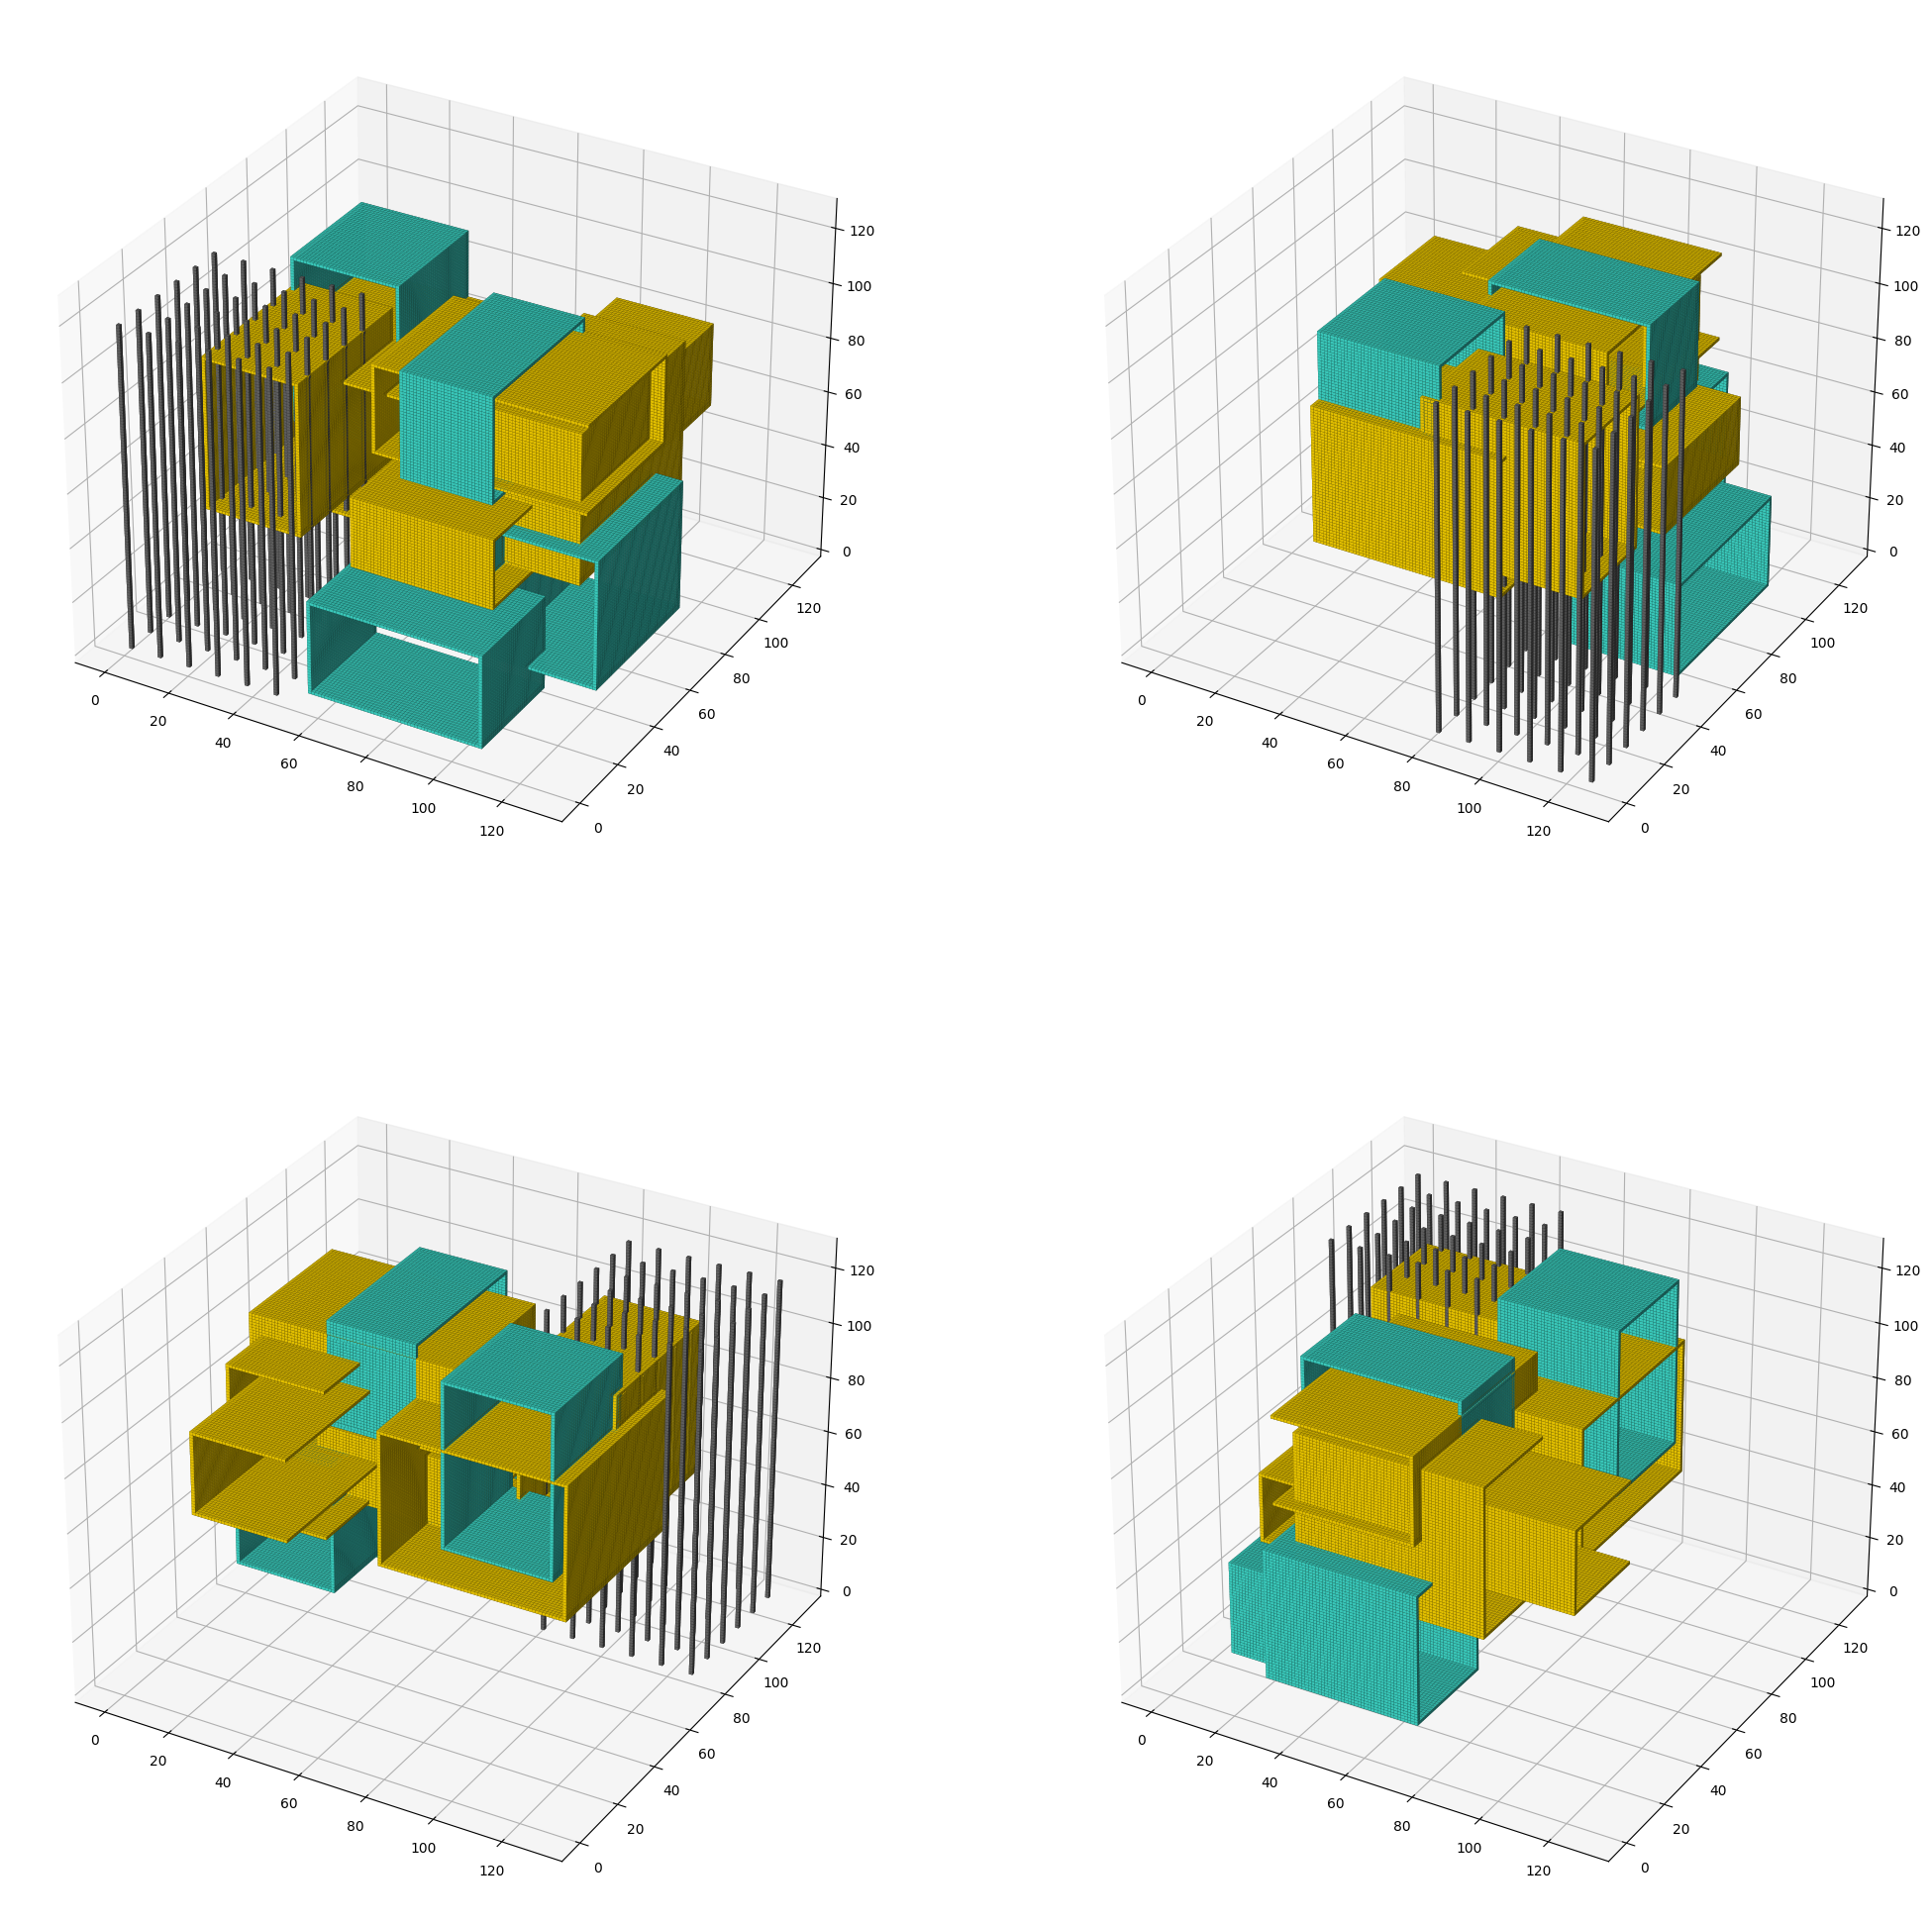

In [2]:
sample = 1

Plotter(volumes[sample], colors[sample]).plot_sculpture(out_dir)

In [3]:
sample = 2

Plotter(volumes[sample], colors[sample]).plot_sculpture(out_dir)

In [ ]:
sample = 5

Plotter(volumes[sample], colors[sample]).plot_sculpture(out_dir)